<a href="https://colab.research.google.com/github/aag112/LitView/blob/main/Sentiment_Analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Sample data file - Sheet1.csv')

In [5]:
df.head

<bound method NDFrame.head of                              Title WorkoutType  \
0                  TMP Run 3 miles         Run   
1                         AER Ride        Bike   
2                  Downhill skiing       Other   
3                          Day Off     Day Off   
4                    Alpine Skiing       Other   
...                            ...         ...   
1279                 Alpine Skiing       Other   
1280                      Track Me       Other   
1281  Alternative Training Session       Other   
1282                       AER Run         Run   
1283                      Track Me       Other   

                                          WorkoutDescription  PlannedDuration  \
0     2 miles Warm up 3 miles @70%, Zone 3+ 1 mile Cool down              nan   
1                                                        NaN             1.00   
2                                                        NaN              nan   
3                                            

In [5]:
df.info

<bound method DataFrame.info of                              Title WorkoutType  ...  Rpe  Feeling
0                  TMP Run 3 miles         Run  ...  NaN      NaN
1                         AER Ride        Bike  ...  6.0      5.0
2                  Downhill skiing       Other  ...  6.0      3.0
3                          Day Off     Day Off  ...  NaN      NaN
4                    Alpine Skiing       Other  ...  5.0      5.0
...                            ...         ...  ...  ...      ...
1279                 Alpine Skiing       Other  ...  NaN      NaN
1280                      Track Me       Other  ...  4.0      5.0
1281  Alternative Training Session       Other  ...  5.0      5.0
1282                       AER Run         Run  ...  5.0      5.0
1283                      Track Me       Other  ...  4.0      5.0

[1284 rows x 45 columns]>

In [6]:
df

,Title,WorkoutType,WorkoutDescription,PlannedDuration,PlannedDistanceInMeters,WorkoutDay,CoachComments,DistanceInMeters,PowerAverage,PowerMax,Energy,AthleteComments,TimeTotalInHours,VelocityAverage,VelocityMax,CadenceAverage,CadenceMax,HeartRateAverage,HeartRateMax,TorqueAverage,TorqueMax,IF,TSS,HRZone1Minutes,HRZone2Minutes,HRZone3Minutes,HRZone4Minutes,HRZone5Minutes,HRZone6Minutes,HRZone7Minutes,HRZone8Minutes,HRZone9Minutes,HRZone10Minutes,PWRZone1Minutes,PWRZone2Minutes,PWRZone3Minutes,PWRZone4Minutes,PWRZone5Minutes,PWRZone6Minutes,PWRZone7Minutes,PWRZone8Minutes,PWRZone9Minutes,PWRZone10Minutes,Rpe,Feeling
0,TMP Run 3 miles,Run,"2 miles Warm up 3 miles @70%, Zone 3+ 1 mile C...",NaN,9656.067383,2020-01-01,NaN,NaN,NaN,NaN,NaN,*01/01/2020 Becky DiSorbo: Need to do another...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AER Ride,Bike,NaN,1.0,NaN,2020-01-01,NaN,28968.192000,NaN,NaN,NaN,*01/01/2020 Becky DiSorbo: Rode the trainer b...,1.000641,8.041564,NaN,NaN,NaN,111.0,138.0,NaN,NaN,0.624232,43.20,43.0,16.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,5.0
2,Downhill skiing,Other,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,*01/01/2020 Becky DiSorbo: About ten runs. Co...,1.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,3.0
3,Day Off,Day Off,NaN,NaN,NaN,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alpine Skiing,Other,NaN,NaN,NaN,2020-01-02,NaN,3218.688000,NaN,NaN,NaN,*01/02/2020 Becky DiSorbo: Easy skiing. Cold ...,2.001944,0.446606,NaN,NaN,NaN,86.0,99.0,NaN,NaN,0.587168,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,Alpine Skiing,Other,NaN,NaN,NaN,2020-12-30,NaN,7.690000,NaN,NaN,NaN,*12/31/2020 Becky DiSorbo: First two runs did...,0.000556,3.846000,NaN,NaN,NaN,87.0,87.0,NaN,NaN,0.615745,5.59,8.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1280,Track Me,Other,NaN,NaN,NaN,2020-12-30,NaN,16878.300780,NaN,NaN,NaN,*12/31/2020 Becky DiSorbo: Fun ski day.*,1.728151,2.713000,NaN,NaN,NaN,85.0,121.0,NaN,NaN,0.567889,62.61,104.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0
1281,Alternative Training Session,Other,NaN,1.0,NaN,2020-12-31,NaN,20956.839840,NaN,NaN,NaN,*12/31/2020 Becky DiSorbo: Am ski session. No...,1.333561,4.365000,NaN,NaN,NaN,89.0,120.0,NaN,NaN,0.579084,49.89,80.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0
1282,AER Run,Run,NaN,NaN,4828.033691,2020-12-31,NaN,4869.629883,NaN,NaN,NaN,*01/01/2021 Becky DiSorbo: Slushy snowy shoul...,0.430673,3.141000,NaN,82.0,NaN,144.0,170.0,NaN,NaN,1.058017,52.28,0.0,9.0,6.0,3.0,0.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0


In [6]:
df = df.drop(columns=['PlannedDuration', 'PlannedDistanceInMeters', 'WorkoutDay', 'CoachComments', 'DistanceInMeters', 'PowerAverage', 'PowerMax'])

In [7]:
df = df.drop(columns=['Energy', 'TimeTotalInHours', 'VelocityAverage', 'VelocityMax', 'CadenceAverage', 'CadenceMax', 'HeartRateAverage', 'HeartRateMax'])

In [8]:
df = df.drop(columns=['TorqueAverage', 'TorqueMax', 'IF', 'TSS', 'HRZone1Minutes', 'HRZone2Minutes', 'HRZone3Minutes', 'HRZone4Minutes', 'HRZone5Minutes', 'HRZone6Minutes'])

In [9]:
df=df.drop(columns=['HRZone7Minutes', 'HRZone8Minutes', 'HRZone9Minutes', 'HRZone10Minutes', 'PWRZone1Minutes', 'PWRZone2Minutes', 'PWRZone3Minutes', 'PWRZone4Minutes', 'PWRZone5Minutes'])

In [10]:
df = df.drop(columns=['PWRZone6Minutes', 'PWRZone7Minutes', 'PWRZone8Minutes', 'PWRZone9Minutes', 'PWRZone10Minutes'])

In [12]:
df

,Title,WorkoutType,WorkoutDescription,AthleteComments,Rpe,Feeling
0,TMP Run 3 miles,Run,"2 miles Warm up 3 miles @70%, Zone 3+ 1 mile C...",*01/01/2020 Becky DiSorbo: Need to do another...,NaN,NaN
1,AER Ride,Bike,NaN,*01/01/2020 Becky DiSorbo: Rode the trainer b...,6.0,5.0
2,Downhill skiing,Other,NaN,*01/01/2020 Becky DiSorbo: About ten runs. Co...,6.0,3.0
3,Day Off,Day Off,NaN,NaN,NaN,NaN
4,Alpine Skiing,Other,NaN,*01/02/2020 Becky DiSorbo: Easy skiing. Cold ...,5.0,5.0
...,...,...,...,...,...,...
1279,Alpine Skiing,Other,NaN,*12/31/2020 Becky DiSorbo: First two runs did...,NaN,NaN
1280,Track Me,Other,NaN,*12/31/2020 Becky DiSorbo: Fun ski day.*,4.0,5.0
1281,Alternative Training Session,Other,NaN,*12/31/2020 Becky DiSorbo: Am ski session. No...,5.0,5.0
1282,AER Run,Run,NaN,*01/01/2021 Becky DiSorbo: Slushy snowy shoul...,5.0,5.0


In [13]:
df.isna().sum()

Title                   5
WorkoutType             0
WorkoutDescription    962
AthleteComments       555
Rpe                   566
Feeling               548
dtype: int64

In [11]:
#We're going to adjust the dataframe by removing rows with no inputs. The Workout Description is empty for 962/1284 rows so we'll get rid of this
df = df.drop(columns=['WorkoutDescription'])
df = df.dropna()
df = df.reset_index(drop=True)
df

,Title,WorkoutType,AthleteComments,Rpe,Feeling
0,AER Ride,Bike,*01/01/2020 Becky DiSorbo: Rode the trainer but didn’t get app and software set up since slept in after late night and wanted to ride before skiing. 10 min warm up 20 mins of drills including 3x1 leg at a time and then cycling dynamic drills. 4x (3 mins moderate then 2 mins in harder Gear and lower rpm) 10 mins easy* *01/01/2020 Becky DiSorbo: Garmin watch for heart rate.* *01/03/2020 Becky DiSorbo: Estimate on mileage*,6.00,5.00
1,Downhill skiing,Other,*01/01/2020 Becky DiSorbo: About ten runs. Cold out. 26 degrees plus windchill.* *01/01/2020 Becky DiSorbo: Forgot to start Garmin.*,6.00,3.00
2,Alpine Skiing,Other,*01/02/2020 Becky DiSorbo: Easy skiing. Cold reared it’s head last night.* *01/02/2020 Becky DiSorbo: Garmin didn’t record the runs.*,5.00,5.00
3,AER Run,Run,*01/03/2020 Becky DiSorbo: Felt good without much effort. Hamstring a little tight last mile.*,6.00,5.00
4,AER Ride,Bike,*01/03/2020 Becky DiSorbo: Used heart rate monitor. Didn’t get the trainer connected yet.* *01/03/2020 Becky DiSorbo: Feel better. Cold seems just about over. :-)* *01/03/2020 Becky DiSorbo: Mileage estimate*,6.00,5.00
...,...,...,...,...,...
647,Peloton Ride,Bike,"*12/30/2020 Becky DiSorbo: Zones 4&5 painful Warm up 1) 17 min interval 3 mins zone 3, 4 mins zone 4, repeat to 17 mins Zone 1 recovery 2) 9 min interval 3 times - 2 mins zone 3, 1 min zone 5 Zone 1 recovery 17 min interval same as before Warm down* *12/30/2020 Becky DiSorbo: It helped having done the ftp test which made me work harder.*",7.00,7.00
648,Track Me,Other,*12/31/2020 Becky DiSorbo: Fun ski day.*,4.00,5.00
649,Alternative Training Session,Other,*12/31/2020 Becky DiSorbo: Am ski session. No lines. :-)*,5.00,5.00
650,AER Run,Run,*01/01/2021 Becky DiSorbo: Slushy snowy shoulder but mostly road surface.*,5.00,5.00


In [12]:
conditions = [(df['Rpe'] < 4.00),
              (df['Rpe'] >= 4.00) & (df['Rpe'] <= 7.00),
              (df['Rpe'] > 7.00)]

values = ['Underworked','Balanced', 'Overworked']
df['Sentiment'] = np.select(conditions, values)
df.head()

,Title,WorkoutType,AthleteComments,Rpe,Feeling,Sentiment
0,AER Ride,Bike,*01/01/2020 Becky DiSorbo: Rode the trainer but didn’t get app and software set up since slept in after late night and wanted to ride before skiing. 10 min warm up 20 mins of drills including 3x1 leg at a time and then cycling dynamic drills. 4x (3 mins moderate then 2 mins in harder Gear and lower rpm) 10 mins easy* *01/01/2020 Becky DiSorbo: Garmin watch for heart rate.* *01/03/2020 Becky DiSorbo: Estimate on mileage*,6.00,5.00,Balanced
1,Downhill skiing,Other,*01/01/2020 Becky DiSorbo: About ten runs. Cold out. 26 degrees plus windchill.* *01/01/2020 Becky DiSorbo: Forgot to start Garmin.*,6.00,3.00,Balanced
2,Alpine Skiing,Other,*01/02/2020 Becky DiSorbo: Easy skiing. Cold reared it’s head last night.* *01/02/2020 Becky DiSorbo: Garmin didn’t record the runs.*,5.00,5.00,Balanced
3,AER Run,Run,*01/03/2020 Becky DiSorbo: Felt good without much effort. Hamstring a little tight last mile.*,6.00,5.00,Balanced
4,AER Ride,Bike,*01/03/2020 Becky DiSorbo: Used heart rate monitor. Didn’t get the trainer connected yet.* *01/03/2020 Becky DiSorbo: Feel better. Cold seems just about over. :-)* *01/03/2020 Becky DiSorbo: Mileage estimate*,6.00,5.00,Balanced


In [14]:
df['Sentiment'].value_counts()

Balanced       599
Overworked      36
Underworked     17
Name: Sentiment, dtype: int64

In [15]:
from bs4 import BeautifulSoup

In [16]:
def strip_html(text):
  soup = BeautifulSoup(text, "html.parser")
  return soup.get_text()

In [17]:
import re
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

In [18]:
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

In [19]:
df['AthleteComments']=df['AthleteComments'].apply(denoise_text)

In [20]:
df.head(20)

,Title,WorkoutType,AthleteComments,Rpe,Feeling,Sentiment
0,AER Ride,Bike,*01/01/2020 Becky DiSorbo: Rode the trainer but didn’t get app and software set up since slept in after late night and wanted to ride before skiing. 10 min warm up 20 mins of drills including 3x1 leg at a time and then cycling dynamic drills. 4x (3 mins moderate then 2 mins in harder Gear and lower rpm) 10 mins easy* *01/01/2020 Becky DiSorbo: Garmin watch for heart rate.* *01/03/2020 Becky DiSorbo: Estimate on mileage*,6.00,5.00,Balanced
1,Downhill skiing,Other,*01/01/2020 Becky DiSorbo: About ten runs. Cold out. 26 degrees plus windchill.* *01/01/2020 Becky DiSorbo: Forgot to start Garmin.*,6.00,3.00,Balanced
2,Alpine Skiing,Other,*01/02/2020 Becky DiSorbo: Easy skiing. Cold reared it’s head last night.* *01/02/2020 Becky DiSorbo: Garmin didn’t record the runs.*,5.00,5.00,Balanced
3,AER Run,Run,*01/03/2020 Becky DiSorbo: Felt good without much effort. Hamstring a little tight last mile.*,6.00,5.00,Balanced
4,AER Ride,Bike,*01/03/2020 Becky DiSorbo: Used heart rate monitor. Didn’t get the trainer connected yet.* *01/03/2020 Becky DiSorbo: Feel better. Cold seems just about over. :-)* *01/03/2020 Becky DiSorbo: Mileage estimate*,6.00,5.00,Balanced
5,OD Ride,Bike,*01/04/2020 Becky DiSorbo: Still not hooked up. Estimate I rode 32. Seat very uncomfortable on this bike so in future need my own seat.* *01/04/2020 Becky DiSorbo: Did 3 sets of one leg pedal drills for 1 min each. 1 min recovery after each set.*,6.00,5.00,Balanced
6,Swim,Swim,*01/04/2020 Becky DiSorbo: 1000 straight 250 mix of back and drill 550 swim 250 mix of back and drill 200 swim 8x25s breath every 7 on :30 100 easy* *01/04/2020 Becky DiSorbo: First 1000 relaxed finished in 14;51 average 1:33 pace*,5.00,5.00,Balanced
7,OD Run,Run,*01/05/2020 Becky DiSorbo: Snowy so harder run surface. :-) fun though.*,6.00,5.00,Balanced
8,Alpine Skiing,Other,*01/05/2020 Becky DiSorbo: Garmin fail. Only did 4 runs. Too bumpy.*,4.00,5.00,Balanced
9,Swim,Swim,*01/07/2020 Becky DiSorbo: Felt a little sluggish since I had several days off. Relatively Easy swim. Long course meters. 400 warm up 8x75s on 1:20 3x200s on 3:30 12x50s grant Hackett on 1:00 fastest was 41/42 200 easy*,5.00,7.00,Balanced


In [21]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

In [22]:
def Convert_to_bin(text, remove_digits=True):
    if text=='Overworked':
      text= 1
    elif text=='Underworked':
      text=0
    elif text=='Balanced':
      text=2
    return text

In [23]:
df['AthleteComments']=df['AthleteComments'].apply(remove_special_characters)

In [24]:
df['Sentiment']=df['Sentiment'].apply(Convert_to_bin)

In [25]:
df.head()

,Title,WorkoutType,AthleteComments,Rpe,Feeling,Sentiment
0,AER Ride,Bike,01012020 Becky DiSorbo Rode the trainer but didnt get app and software set up since slept in after late night and wanted to ride before skiing 10 min warm up 20 mins of drills including 3x1 leg at a time and then cycling dynamic drills 4x 3 mins moderate then 2 mins in harder Gear and lower rpm 10 mins easy 01012020 Becky DiSorbo Garmin watch for heart rate 01032020 Becky DiSorbo Estimate on mileage,6.00,5.00,2
1,Downhill skiing,Other,01012020 Becky DiSorbo About ten runs Cold out 26 degrees plus windchill 01012020 Becky DiSorbo Forgot to start Garmin,6.00,3.00,2
2,Alpine Skiing,Other,01022020 Becky DiSorbo Easy skiing Cold reared its head last night 01022020 Becky DiSorbo Garmin didnt record the runs,5.00,5.00,2
3,AER Run,Run,01032020 Becky DiSorbo Felt good without much effort Hamstring a little tight last mile,6.00,5.00,2
4,AER Ride,Bike,01032020 Becky DiSorbo Used heart rate monitor Didnt get the trainer connected yet 01032020 Becky DiSorbo Feel better Cold seems just about over 01032020 Becky DiSorbo Mileage estimate,6.00,5.00,2


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X=df['AthleteComments'].values
Y=df['Sentiment'].values

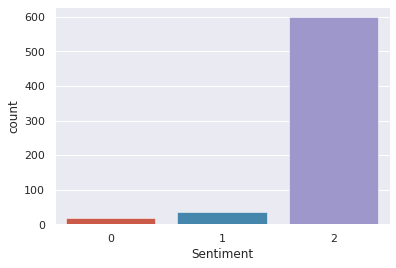

In [28]:
import seaborn as sns
sns.countplot(df['Sentiment'])

In [29]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.3)

First Approach: Bag of Words

#TF-IDF Vectorizer: It calculates two things term frequency and inverse document frequency. Term frequency= No. of times the word appears in the sample. IDF = log ( number of time the word appears in the sample / number of time the word appears in the whole document). This helps to note some differences like the word "The" appears with same freq in almost all sentences while special words carrying significance like "good" don't. So, these TF and IDF terms are multiplied to obtain the vector formats for each sample.

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
vec = TfidfVectorizer()

In [32]:
vec.fit(X_train)

TfidfVectorizer()

In [33]:
x_train=vec.transform(X_train)

In [34]:
x_test=vec.transform(X_test)

In [35]:
x_train

<456x2284 sparse matrix of type '<class 'numpy.float64'>'
	with 13457 stored elements in Compressed Sparse Row format>

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, Y_train)

LogisticRegression()

In [37]:
score_test = lr.score(x_test, Y_test)

In [38]:
score_test

0.8979591836734694

In [39]:
score_train = lr.score(x_train, Y_train)

In [40]:
score_train

0.9276315789473685

In [ ]:
Second Approach: Word Embeddings

In [56]:
#!pip install autoviml

     |████████████████████████████████| 133kB 3.9MB/s 
     |████████████████████████████████| 215kB 16.6MB/s 
     |████████████████████████████████| 166.7MB 81kB/s 
     |████████████████████████████████| 133kB 44.6MB/s 
     |████████████████████████████████| 22.3MB 1.5MB/s 
     |████████████████████████████████| 67.3MB 59kB/s 
     |████████████████████████████████| 358kB 41.8MB/s 
     |████████████████████████████████| 133kB 25.0MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491625 sha256=6e594272941d95db8692681550a47986883e8af019b4d7709bdc8aa221ad625a
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: imbalanced-learn 0.4.3
    Uninstalling imbalanced-learn-0.4.3:
      Succe

In [41]:
from autoviml.Auto_NLP import Auto_NLP

In [42]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

In [43]:
input_feature, target = "AthleteComments", "Sentiment"

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

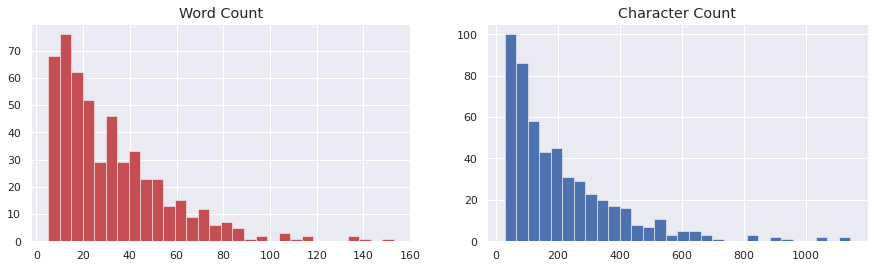

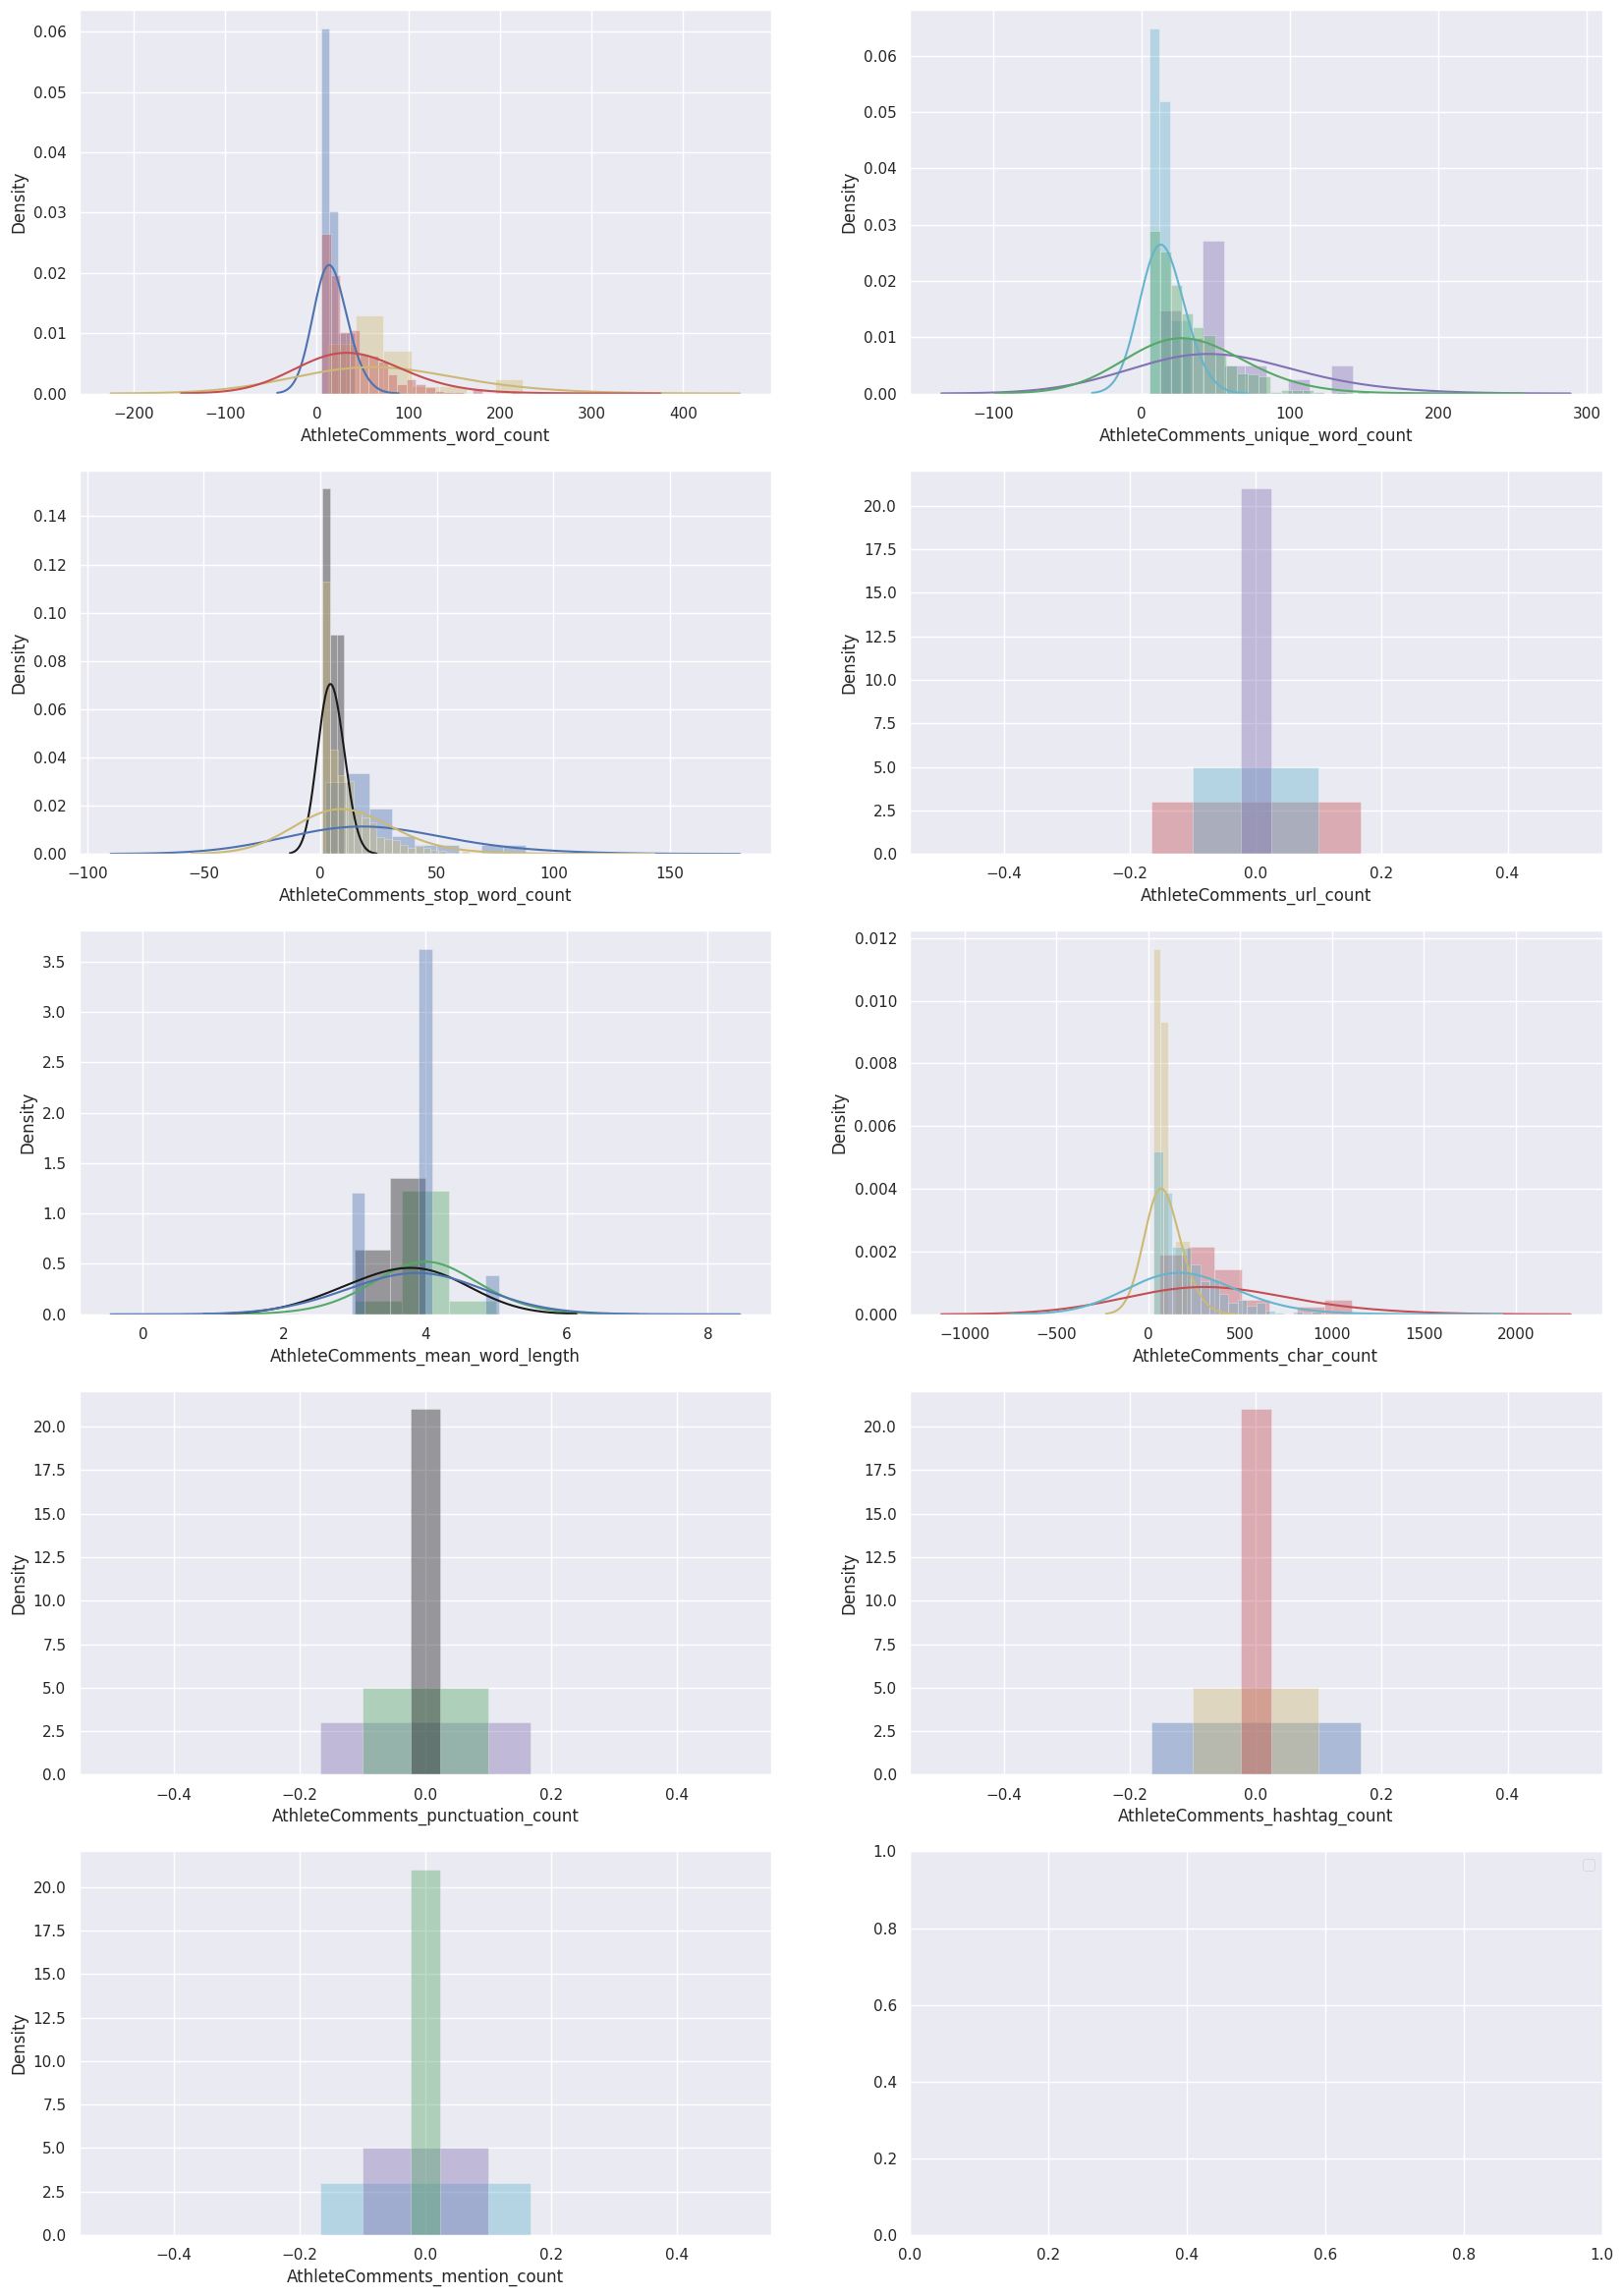

    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for AthleteComments column
    Faster text processing using clean_text function, since top_num_features is below 300
    Time Taken for Expanding emojis and abbreviations in data = 1 seconds
        Time Taken for Processing text in data = 4 seconds
Train data Text cleaning completed. Time taken = 9 seconds

For target = Sentiment

    For class = 0
Top 200 n-grams
: ['friend', 'leg', 'do', 'ski', 'hike', 'ride', 'joe', 'thats', 'super', 'go', 'run', 'disorbo easy', 'disorbo hike', 'easy ski', 'super easy', 'ski joe', 'becky disorbo easy', 'becky disorbo hike', 'disorbo easy ski', 'easy ski joe']
    Top n-grams that are most frequent in this class are: 20

    For class = 1
Top 200 n-grams
: ['felt', 'work', 'leg', 'hard', 'but', 'mile', 'easy', 'do', 'good', 'strong', 'xs', 'x', 'warm', 'nick', 'radkewich', 'fast', 'after', 'feel', 'go', 'interval', 'min', 'tire', 'uphill', 'back', 

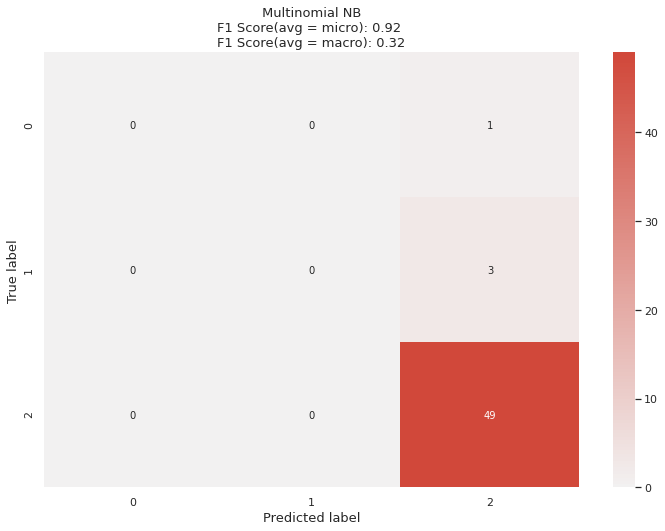

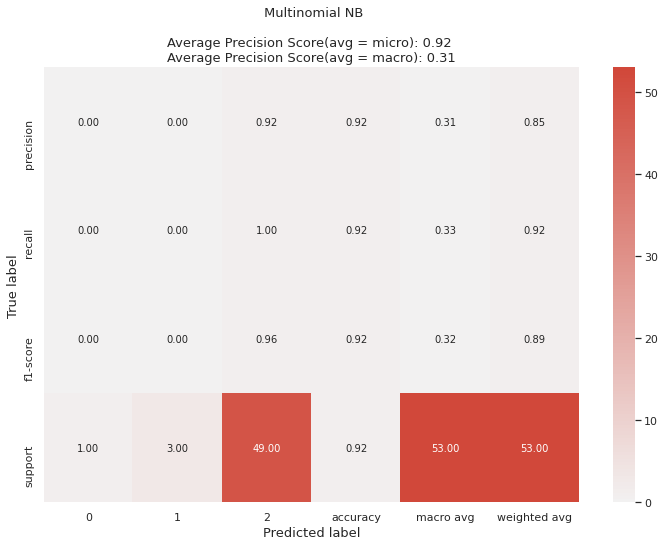

  Now transforming Train data to return as output...
    Time Taken for Expanding emojis and abbreviations in data = 0 seconds
        Time Taken for Processing text in data = 2 seconds
  Transforming Test data to return as output...
    Time Taken for Expanding emojis and abbreviations in data = 0 seconds
        Time Taken for Processing text in data = 1 seconds
Training best Auto_NLP Pipeline on full Train data...will be faster since best params are known
    Time Taken for Expanding emojis and abbreviations in data = 0 seconds
        Time Taken for Processing text in data = 1 seconds
    Returning best Auto_NLP pipeline to transform and make predictions on test data...
    Time Taken for Expanding emojis and abbreviations in data = 0 seconds
        Time Taken for Processing text in data = 1 seconds
Training completed. Time taken for Auto_NLP = 0.4 minutes
#########          A U T O   N L P  C O M P L E T E D    ###############################


In [44]:
train_x, test_x, final, predicted= Auto_NLP(input_feature, train, test,target,score_type="balanced_accuracy",
                                            top_num_features=100,modeltype="Classification", verbose=2, build_model=True)

In [46]:
final.predict(test_x['AthleteComments'])

    Time Taken for Expanding emojis and abbreviations in data = 0 seconds
        Time Taken for Processing text in data = 1 seconds


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])